In [265]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

In [266]:
train = pd.read_csv('export_train.csv')
test = pd.read_csv('export_test.csv')
df = train
weather = pd.read_csv('weather.csv')
weather['days'] = weather['day']
weather = weather.drop(['Unnamed: 0'], axis = 1)
weather = weather.drop(['day'], axis = 1)
train = pd.merge(train, weather, on = ['month', 'days', 'hour','year'], how = 'left')
test = pd.merge(test, weather, on = ['month', 'days', 'hour','year'], how = 'left')

In [267]:
train.head()

,Unnamed: 0,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,...,month,minute,days,year,DistrictPickup,DistrictDropoff,Temp.,Visibility,Precip,Conditions
0,1,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.943771,...,3,24,14,2016,95,13,4.4,8.0,0.3,Overcast
1,2,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.243523,...,6,43,12,2016,73,48,28.9,16.1,0.0,Unknown
2,3,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.596895,...,1,35,19,2016,82,93,-6.7,16.1,0.0,Clear
3,4,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.481199,...,4,32,6,2016,65,77,7.2,16.1,0.0,Clear
4,5,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.178525,...,3,30,26,2016,57,26,9.4,16.1,0.0,Clear


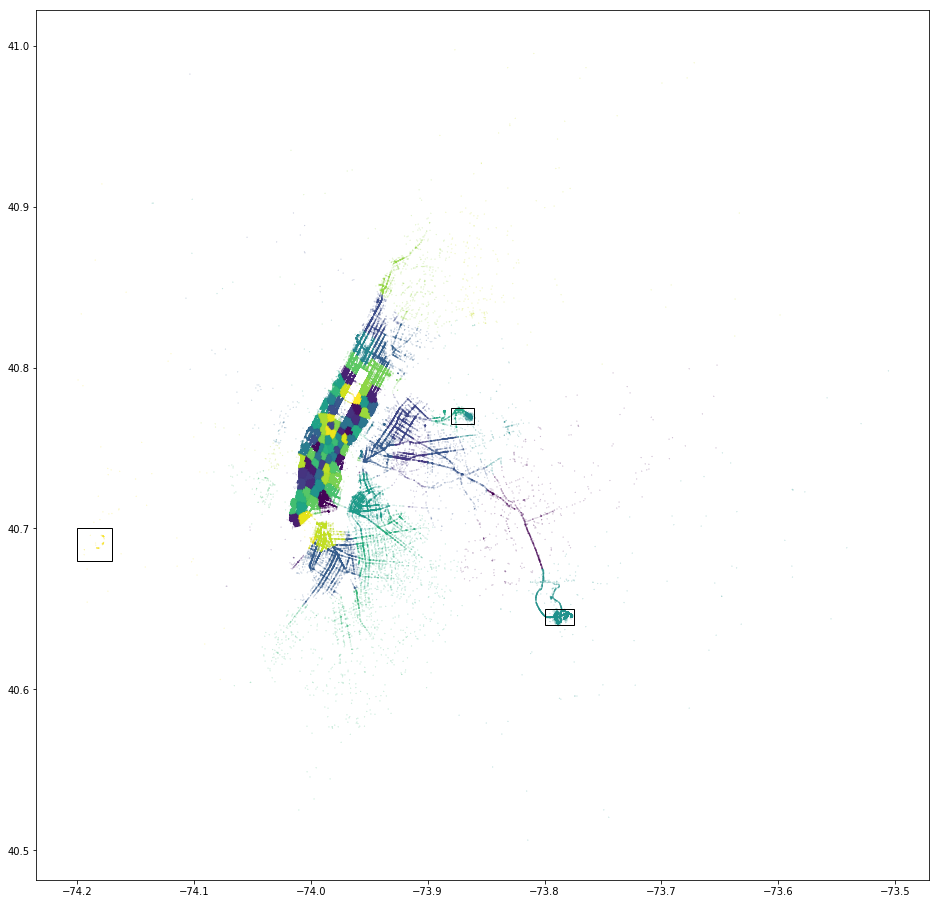

In [302]:
from numpy.random import randint
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

yop = train

clusterClr = yop['DistrictPickup']


plt.figure(figsize=(16,16))
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((-73.8, 40.64), 0.025, 0.01, fill=None, alpha=1))
currentAxis.add_patch(Rectangle((-73.88, 40.765), 0.02, 0.01, fill=None, alpha=1))
currentAxis.add_patch(Rectangle((-74.2, 40.68), 0.03, 0.02, fill=None, alpha=1))

plt.scatter(yop['pickup_longitude'], yop['pickup_latitude'], s = 0.01, c = clusterClr)
plt.show()

In [303]:
train['Airport'] = "None"
train.Airport[(train.pickup_longitude > -73.8) & (train.pickup_longitude < -73.775) & 
           (train.pickup_latitude > 40.64) & (train.pickup_latitude < 40.65)] = "FromJFK"
train.Airport[(train.pickup_longitude > -73.88) & (train.pickup_longitude < -73.86) & 
           (train.pickup_latitude > 40.765) & (train.pickup_latitude < 40.775)] = "FromLaguardia"
train.Airport[(train.pickup_longitude > -74.2) & (train.pickup_longitude < -74.17) & 
           (train.pickup_latitude > 40.68) & (train.pickup_latitude < 40.7)] = "FromNewark"

test['Airport'] = "None"
test.Airport[(test.pickup_longitude > -73.8) & (test.pickup_longitude < -73.775) & 
           (test.pickup_latitude > 40.64) & (test.pickup_latitude < 40.65)] = "FromJFK"
test.Airport[(test.pickup_longitude > -73.88) & (test.pickup_longitude < -73.86) & 
           (test.pickup_latitude > 40.765) & (test.pickup_latitude < 40.775)] = "FromLaguardia"
test.Airport[(test.pickup_longitude > -74.2) & (test.pickup_longitude < -74.17) & 
           (test.pickup_latitude > 40.68) & (test.pickup_latitude < 40.7)] = "FromNewark"

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is 

In [304]:
train.Airport[(train.dropoff_longitude > -73.8) & (train.dropoff_longitude < -73.775) & 
           (train.dropoff_latitude > 40.64) & (train.dropoff_latitude < 40.65)] = "ToJFK"
train.Airport[(train.dropoff_longitude > -73.88) & (train.dropoff_longitude < -73.86) & 
           (train.dropoff_latitude > 40.765) & (train.dropoff_latitude < 40.775)] = "ToLaguardia"
train.Airport[(train.dropoff_longitude > -74.2) & (train.dropoff_longitude < -74.17) & 
           (train.dropoff_latitude > 40.68) & (train.dropoff_latitude < 40.7)] = "ToNewark"

test['Airport'] = "None"
test.Airport[(test.dropoff_longitude > -73.8) & (test.dropoff_longitude < -73.775) & 
           (test.dropoff_latitude > 40.64) & (test.dropoff_latitude < 40.65)] = "ToJFK"
test.Airport[(test.dropoff_longitude > -73.88) & (test.dropoff_longitude < -73.86) & 
           (test.dropoff_latitude > 40.765) & (test.dropoff_latitude < 40.775)] = "ToLaguardia"
test.Airport[(test.dropoff_longitude > -74.2) & (test.dropoff_longitude < -74.17) & 
           (test.dropoff_latitude > 40.68) & (test.dropoff_latitude < 40.7)] = "ToNewark"

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [301]:
np.unique(train.Airport)

array(['FromJFK', 'FromLaguardia', 'FromNewark', 'None', 'ToJFK',
       'ToLaguardia', 'ToNewark'], dtype=object)

In [320]:
np.sum(train.DistrictPickup == 100)

15893

In [269]:
import math

def rotate_around_point_highperfX(x, y, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "high performance" version since we're caching some
    values that are needed >1 time. It's less readable than the previous
    function but it's faster.
    """
    #x, y = xy
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = math.cos(radians)
    sin_rad = math.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y

    return qx #, qy

#############################

def rotate_around_point_highperfY(x, y, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "high performance" version since we're caching some
    values that are needed >1 time. It's less readable than the previous
    function but it's faster.
    """
    #x, y = xy
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = math.cos(radians)
    sin_rad = math.sin(radians)
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y

    return qy

In [270]:
train['xRotatePickup'] = rotate_around_point_highperfX(train['pickup_latitude'], train['pickup_longitude'], 1.57, (40.75,-73.95))
train['yRotatePickup'] = rotate_around_point_highperfY(train['pickup_latitude'], train['pickup_longitude'], 1.57, (40.75,-73.95))
train['xRotateDropoff'] = rotate_around_point_highperfX(train['dropoff_latitude'], train['dropoff_longitude'], 1.57, (40.75,-73.95))
train['yRotateDropoff'] = rotate_around_point_highperfY(train['dropoff_latitude'], train['dropoff_longitude'], 1.57, (40.75,-73.95))

In [271]:
test['xRotatePickup'] = rotate_around_point_highperfX(test['pickup_latitude'], test['pickup_longitude'], 1.57, (40.75,-73.95))
test['yRotatePickup'] = rotate_around_point_highperfY(test['pickup_latitude'], test['pickup_longitude'], 1.57, (40.75,-73.95))
test['xRotateDropoff'] = rotate_around_point_highperfX(test['dropoff_latitude'], test['dropoff_longitude'], 1.57, (40.75,-73.95))
test['yRotateDropoff'] = rotate_around_point_highperfY(test['dropoff_latitude'], test['dropoff_longitude'], 1.57, (40.75,-73.95))

In [8]:
train.head()

,Unnamed: 0,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,...,DistrictPickup,DistrictDropoff,Temp.,Visibility,Precip,Conditions,xRotatePickup,yRotatePickup,xRotateDropoff,yRotateDropoff
0,1,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.943771,...,95,13,4.4,8.0,0.3,Overcast,40.717859,-73.967962,40.735382,-73.965614
1,2,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.243523,...,73,48,28.9,16.1,0.0,Unknown,40.719576,-73.938588,40.700504,-73.931191
2,3,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.596895,...,82,93,-6.7,16.1,0.0,Clear,40.720984,-73.963962,40.694635,-73.910131
3,4,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.481199,...,65,77,7.2,16.1,0.0,Clear,40.689936,-73.920019,40.687697,-73.906768
4,5,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.178525,...,57,26,9.4,16.1,0.0,Clear,40.726981,-73.993227,40.727103,-73.982539


In [9]:
test.head()

,Unnamed: 0,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,day,...,DistrictPickup,DistrictDropoff,Temp.,Visibility,Precip,Conditions,xRotatePickup,yRotatePickup,xRotateDropoff,yRotateDropoff
0,1,1,1,-73.988129,40.732029,-73.990173,40.756680,N,2.726993,Thursday,...,88,46,24.4,16.1,0.0,Clear,40.711857,-73.932059,40.709832,-73.956712
1,2,1,1,-73.964203,40.679993,-73.959808,40.655403,N,2.752503,Thursday,...,30,82,24.4,16.1,0.0,Clear,40.735741,-73.880004,40.740116,-73.855411
2,3,1,1,-73.997437,40.737583,-73.986160,40.729523,N,1.521927,Thursday,...,8,92,24.4,16.1,0.0,Clear,40.702554,-73.937621,40.713823,-73.929552
3,4,2,1,-73.956070,40.771900,-73.986427,40.730469,N,5.650760,Thursday,...,85,92,24.4,16.1,0.0,Clear,40.743947,-73.971905,40.713557,-73.930498
4,5,1,1,-73.970215,40.761475,-73.961510,40.755890,N,1.137365,Thursday,...,4,60,24.4,16.1,0.0,Clear,40.729794,-73.961491,40.738495,-73.955899


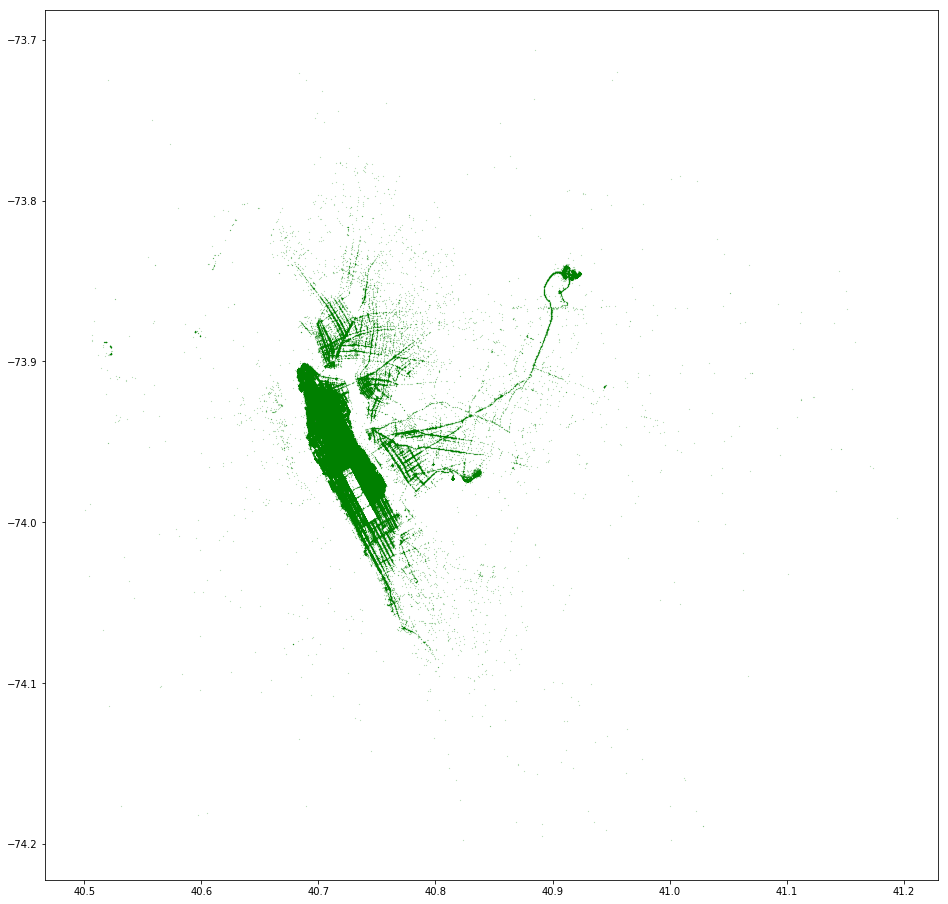

In [10]:
plt.figure(figsize=(16,16))
plt.scatter(train['xRotatePickup'], train['yRotatePickup'], color = 'green', s = 0.01)
plt.show()

In [ ]:
train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].head()

In [ ]:
#cluster = KMeans(n_clusters=100, verbose=10).fit(train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])
#cluster

In [272]:
train = train.drop("Unnamed: 0", axis = 1)
test = test.drop("Unnamed: 0", axis = 1)

In [237]:
train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,day,...,DistrictDropoff,Temp.,Visibility,Precip,Conditions,Airport,xRotatePickup,yRotatePickup,xRotateDropoff,yRotateDropoff
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.943771,Monday,...,13,4.4,8.0,0.3,Overcast,None,40.717859,-73.967962,40.735382,-73.965614
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.243523,Sunday,...,48,28.9,16.1,0.0,Unknown,None,40.719576,-73.938588,40.700504,-73.931191
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.596895,Tuesday,...,93,-6.7,16.1,0.0,Clear,None,40.720984,-73.963962,40.694635,-73.910131
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.481199,Wednesday,...,77,7.2,16.1,0.0,Clear,None,40.689936,-73.920019,40.687697,-73.906768
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.178525,Saturday,...,26,9.4,16.1,0.0,Clear,None,40.726981,-73.993227,40.727103,-73.982539


In [273]:
dummy_train = pd.get_dummies(train['store_and_fwd_flag'])
dummy_test = pd.get_dummies(test['store_and_fwd_flag'])

In [274]:
dummy_train.head()

,N,Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [275]:
train = pd.concat([train,dummy_train], axis = 1)
test = pd.concat([test,dummy_test], axis = 1)

In [276]:
dummy_train = pd.get_dummies(train['Airport'])
dummy_test = pd.get_dummies(test['Airport'])
train = pd.concat([train,dummy_train], axis = 1)
test = pd.concat([test,dummy_test], axis = 1)
train = train.drop('Airport', axis = 1)
test = test.drop('Airport', axis = 1)

In [277]:
dummy_train = pd.get_dummies(train['Conditions'])
dummy_test = pd.get_dummies(test['Conditions'])

In [278]:
train = pd.concat([train,dummy_train], axis = 1)
test = pd.concat([test,dummy_test], axis = 1)

In [279]:
train = train.drop('store_and_fwd_flag', axis = 1)
test = test.drop('store_and_fwd_flag', axis = 1)

In [280]:
train = train.drop('Conditions', axis = 1)
test = test.drop('Conditions', axis = 1)

In [ ]:
train = train.drop('N', axis = 1)
test = test.drop('N', axis = 1)

In [ ]:
train = train.drop('Unknown', axis = 1)
test = test.drop('Unknown', axis = 1)

In [ ]:
train.iloc[:,20:40].head()

In [281]:
train = train.drop('day', axis = 1)
test = test.drop('day', axis = 1)

In [282]:
train = train.drop('year', axis = 1)
test = test.drop('year', axis = 1)

In [283]:
test.tail(5)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,weekday,hour,month,...,Light Freezing Rain,Light Rain,Light Snow,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Unknown
625129,1,1,-74.003464,40.725105,-74.001251,40.733643,0.971982,5,0,1,...,0,0,0,0,1,0,0,0,0,0
625130,1,1,-74.006363,40.743782,-73.953407,40.782467,7.222272,5,0,1,...,0,0,0,0,1,0,0,0,0,0
625131,1,2,-73.972267,40.759865,-73.876602,40.748665,10.574761,5,0,1,...,0,0,0,0,1,0,0,0,0,0
625132,1,1,-73.976501,40.733562,-73.854263,40.891788,22.033092,5,0,1,...,0,0,0,0,1,0,0,0,0,0
625133,2,2,-73.981850,40.716881,-73.969330,40.769379,5.949391,5,0,1,...,0,0,0,0,1,0,0,0,0,0


In [284]:
print(test.shape)
print(train.shape)

(625134, 42)
(1458028, 43)


In [285]:
train.trip_duration.describe()

count    1.458028e+06
mean     9.587911e+02
std      5.237343e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [286]:
train  = train[train.distance > 0]
train  = train[train.trip_duration < 10000]

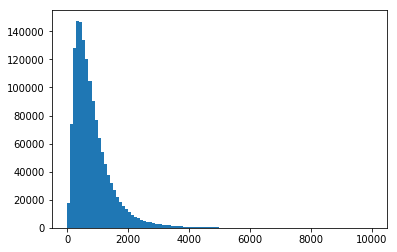

In [287]:
plt.hist(train['trip_duration'], bins = 100)
#plt.xlim(0,1000)
plt.show()

In [288]:
train['distance'] = np.log(train['distance']+1)
test['distance'] = np.log(test['distance']+1)

In [289]:
duration = train['trip_duration']
train = train.drop('trip_duration', axis = 1)

In [ ]:
train.head()

In [25]:
train.fillna(train.median(), inplace=True)

In [290]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, np.log(duration), test_size=0.1, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1305095, 42), (1305095,), (145011, 42), (145011,))

In [293]:
import xgboost as xgb

xgb = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 100, alpha = 5, n_estimators = 50, subsample=0.5, verbosity = 2)

xgb.fit(X_train, y_train)

predictXGB = xgb.predict(X_test)


E:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:54:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:54:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 714 extra nodes, 0 pruned nodes, max_depth=19
[14:54:44] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 580 extra nodes, 0 pruned nodes, max_depth=100
[14:54:48] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=14
[14:55:08] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1890 extra nodes, 0 pruned nodes, max_depth=100
[14:55:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2330 extra nodes, 0 pruned nodes, max_d

[15:14:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1716810 extra nodes, 0 pruned nodes, max_depth=100
[15:15:02] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 853650 extra nodes, 0 pruned nodes, max_depth=100
[15:15:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 928560 extra nodes, 0 pruned nodes, max_depth=100


RMSE: 0.371937


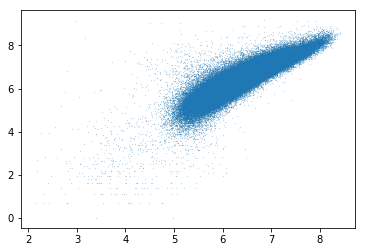

In [294]:
rmse = np.sqrt(mean_squared_error(y_test, predictXGB))
print("RMSE: %f" % (rmse))
plt.scatter(predictXGB, y_test, s = 0.01)
plt.show()

In [295]:
RF = RandomForestRegressor(n_estimators = 20, criterion='mse', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, verbose=2, warm_start=False)

RF.fit(X_train, y_train)

predictRF = RF.predict(X_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictRF))
print("RMSE: %f" % (rmse))
plt.scatter(predictRF, y_test, s = 0.5)
plt.show()

RMSE: 1.130072


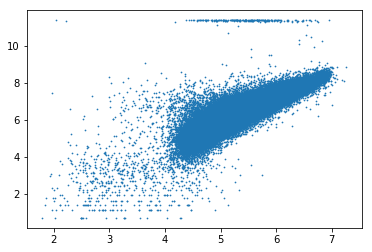

In [33]:
predictEns = predict * 0.5 + predictRF * 0.5
rmse = np.sqrt(mean_squared_error(y_test, predictEns))
print("RMSE: %f" % (rmse))
plt.scatter(predictEns, y_test, s = 0.5)
plt.show()

In [297]:
test.fillna(test.median(), inplace=True)
test = test.replace([-np.inf], 0)
#predictRFtest = RF.predict(test)
predictXGBtest = xgb.predict(test)
predictEns = predictXGBtest

submission = pd.read_csv('sample_submission.csv')

submission.trip_duration = np.exp(predictXGBtest)
submission.head()

submission.to_csv('submission.csv', sep = ',', index=False)


In [ ]:
from sklearn.linear_model import Ridge


Ridge = Ridge()

Ridge.fit(X_train, y_train)

predictRidge = Ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictRidge))
print("RMSE: %f" % (rmse))
plt.scatter(predictRidge, y_test, s = 0.001)
plt.show()

In [ ]:
dummy_train.head()

In [ ]:
import xgboost as xgb

xgb = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 5, n_estimators = 50, subsample=0.5, verbosity = 2)

xgb.fit(dummy_train, duration)

predictXGB = xgb.predict(dummy_test)

####################################################

In [ ]:
dummy_test.distance = dummy_test.distance.replace(-np.inf, 0)
dummy_train.distance = dummy_train.distance.replace(-np.inf, 0)
dummy_test.describe()

In [ ]:
np.sum(dummy_train.isna())

In [ ]:
RF = RandomForestRegressor(n_estimators = 20, criterion='mse', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, verbose=2, warm_start=False)


RF.fit(dummy_train, duration)
predictRF = RF.predict(dummy_test)

####################################################

predictEns = 0.5 * predictRF + 0.5 * predictXGB

In [ ]:
dummy_train.head()

In [ ]:
predictEns

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission.trip_duration = np.exp(predictEns)
submission.head()

In [ ]:
submission.to_csv('submission.csv', sep = ',', index=False)

************************************************************************************
************************* DF SPEED FEATURE CREATION ********************************
************************************************************************************

In [ ]:
df.head()

In [43]:
df['speed'] = df.distance/df.trip_duration * 3600

In [44]:
df  = df[df.distance < np.percentile(df.distance,99.75)]
df  = df[df.trip_duration < np.percentile(df.trip_duration,99.75)]
df  = df[df.distance > 0.1]
df  = df[df.trip_duration > 5]
df  = df[df.speed > 1]
df  = df[df.speed < 100]

In [41]:
train  = train[train.distance < np.percentile(train.distance,99.75)]
train  = train[train.trip_duration < np.percentile(train.trip_duration,99.75)]
train  = train[train.distance > 0.1]
train  = train[train.trip_duration > 5]
train  = train[train.speed > 1]
train  = train[train.speed < 100]

AttributeError: 'DataFrame' object has no attribute 'trip_duration'

In [ ]:
df.describe()

In [ ]:
np.min(df.distance)

In [ ]:
plt.hist(np.log(df.speed[df.speed >0] + 1), bins = 200)
plt.show()

In [ ]:
plt.hist([np.log(df.speed[(df.hour == 17)] + 1), np.log(df.speed[(df.hour == 3)] + 1)], bins = 200)
plt.show()

In [ ]:
speedHour = np.array([])
for i in range(24):
    tmp = np.mean(df.speed[df.hour == i])
    speedHour = np.append(speedHour, tmp)


In [ ]:
plt.plot(np.arange(0,24,1), speedHour)
plt.scatter(np.arange(0,24,1), speedHour, color='red', s = 8)
plt.show()

In [ ]:
speedDay = np.array([])
for i in range(7):
    tmp = np.mean(df.speed[df.weekday == i +1])
    speedDay = np.append(speedDay, tmp)

plt.plot(np.arange(1,8,1), speedDay)
plt.scatter(np.arange(1,8,1), speedDay, color='red', s = 8)
plt.show()

In [ ]:
speedHour

In [ ]:
speedHourDay = np.array([])
for i in range(7):
    for j in range(24):
        tmp = np.mean(df.speed[(df.weekday == i +1) & (df.hour == j)])
        speedHourDay = np.append(speedHourDay, tmp)

plt.plot(np.arange(0,168,1), speedHourDay)
plt.scatter(np.arange(0,168,1), speedHourDay, color='red', s = 8)
plt.show()

In [ ]:
speedHourDayMonth = np.array([])
for h in range(12):
    for i in range(7):
        for j in range(24):
        
            tmp = np.mean(df.speed[(df.weekday == i +1) & (df.hour == j) & (df.month == h)])
            speedHourDayMonth = np.append(speedHourDayMonth, tmp)

plt.figure(figsize=(16,16))
plt.plot(np.arange(0,2016,1), speedHourDayMonth)
plt.scatter(np.arange(0,2016,1), speedHourDayMonth, color='red', s = 8)
plt.show()

In [ ]:
np.unique(df.hour)

In [ ]:
plt.hist(np.mean(df.speed[(df.distance > 1) & (df.distance <2)]))
plt.show()

In [ ]:
np.max(df.speed[(df.distance > 0) & (df.distance < 100)])

In [ ]:
df.head()

In [ ]:
speed = df['speed']
df = df.drop('speed', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['weekday', 'hour', 'minute', 'distance', 'DistrictPickup', 'DistrictDropoff']], np.log(speed+1), test_size=0.1, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
modelSpeed = RandomForestRegressor(n_estimators = 20, criterion='mse', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, verbose=2, warm_start=False)

In [ ]:
modelSpeed.fit(X_train, y_train)

In [ ]:
predict = modelSpeed.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict))
print("RMSE: %f" % (rmse))
plt.scatter(predict, y_test, s = 0.001)
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

In [ ]:
weather = pd.read_csv('weather.csv')
weather['days'] = weather['day']
weather = weather.drop(['Unnamed: 0'], axis = 1)

In [ ]:
weather.head()

In [ ]:
data = pd.merge(df, weather, on = ['month', 'days', 'hour','year'], how = 'left')

In [ ]:
data.head(250)

In [ ]:
np.unique(weather.Conditions)

In [ ]:
plt.hist(weather['Temp.'], bins = 100)
plt.show()

In [26]:
a = train.iloc[0:3,0:7]
a

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,1.079691
1,1,1,-73.980415,40.738564,-73.999481,40.731152,1.176660
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2.027740


In [29]:
zz = a[a.vendor_id == 2]
zz

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,1.079691
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2.027740


In [69]:
df = pd.merge(df, weather, on = ['month', 'days', 'hour','year'], how = 'left')

In [72]:
uu = df[(df.hour == 23) & (df.weekday == 5) & (df.DistrictPickup == 40) & (df.distance < 2)]
ii = df[(df.hour == 7) & (df.weekday == 5) & (df.DistrictPickup == 40)& (df.distance < 2)]
uu.head(250)

,Unnamed: 0,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,...,minute,days,year,DistrictPickup,DistrictDropoff,speed,Temp.,Visibility,Precip,Conditions
38488,39238,2,2,-73.953300,40.767609,-73.945656,40.780418,N,249,1.643865,...,6,22,2016,40,52,23.766729,-1.7,16.1,0.0,Overcast
95650,97546,2,1,-73.956680,40.766891,-73.964645,40.766434,N,234,0.877183,...,24,8,2016,40,13,13.495125,5.6,16.1,0.0,Overcast
128122,130690,1,1,-73.953987,40.764236,-73.955078,40.764862,N,88,0.138356,...,7,4,2016,40,50,5.660009,1.1,16.1,0.0,Clear
150405,153419,2,1,-73.954651,40.763969,-73.964134,40.775524,N,440,1.646619,...,4,4,2016,40,99,13.472334,1.1,16.1,0.0,Clear
241956,246741,2,5,-73.953690,40.766781,-73.945602,40.773731,N,269,1.174134,...,4,4,2016,40,52,15.713316,1.1,16.1,0.0,Clear
312993,319204,2,1,-73.955177,40.768929,-73.958038,40.771210,N,88,0.402825,...,9,6,2016,40,50,16.479192,10.0,11.3,0.0,Overcast
317731,324025,1,1,-73.959015,40.763649,-73.952271,40.769756,N,111,1.001745,...,53,29,2016,40,50,32.489029,0.6,16.1,0.0,Clear
431990,440547,1,1,-73.956894,40.766388,-73.951363,40.774158,N,103,1.050801,...,43,29,2016,40,47,36.727024,0.6,16.1,0.0,Clear
479995,489508,2,1,-73.954170,40.764080,-73.949631,40.780762,N,406,1.905799,...,8,29,2016,40,52,16.898707,9.4,16.1,0.0,Overcast
483638,493219,1,1,-73.954559,40.764313,-73.949051,40.780991,N,374,1.936090,...,51,18,2016,40,52,18.636163,8.9,16.1,0.0,Clear


In [78]:
df.Conditions.unique()

array(['Overcast', 'Unknown', 'Clear', 'Heavy Rain', nan, 'Haze',
       'Partly Cloudy', 'Mostly Cloudy', 'Light Rain', 'Light Snow',
       'Scattered Clouds', 'Snow', 'Rain', 'Heavy Snow',
       'Light Freezing Rain'], dtype=object)

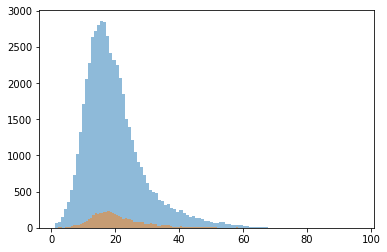

In [136]:
uu = df[(df['hour'] == 8) & (df.weekday == 6)]
ii = df[df['hour'] == 0 & (df.weekday == 6)]
uu.head(5)

plt.hist(ii.speed, bins = 100, alpha = 0.5)
plt.hist(uu.speed, bins = 100, alpha = 0.5)

plt.show()

In [153]:
for i in range(100):
    for j in range(100):
        for h in range(7):
            print('DistrictPU', i + 1)
            print('DistrictDO:', j+ 1)
            print('hour', h)
            print(np.median(df.speed[(df.DistrictPickup == i + 1) & (df.DistrictDropoff == j + 1) & (df.weekday == h +1)]))
            print(np.std(df.speed[(df.DistrictPickup == i + 1) & (df.DistrictDropoff == j + 1) & (df.weekday == h + 1)]))
            print('*************************************')

DistrictPU 1
DistrictDO: 1
hour 0
nan
nan
*************************************
DistrictPU 1
DistrictDO: 1
hour 1
35.067469301764895
5.287067029056557
*************************************
DistrictPU 1
DistrictDO: 1
hour 2
23.042831256102804
0.0
*************************************
DistrictPU 1
DistrictDO: 1
hour 3
nan
nan
*************************************
DistrictPU 1
DistrictDO: 1
hour 4
24.74130739495141
0.0
*************************************
DistrictPU 1
DistrictDO: 1
hour 5
34.407867628780224
5.622072797308922
*************************************
DistrictPU 1
DistrictDO: 1
hour 6
26.43162474789399
16.128961889945543
*************************************
DistrictPU 1
DistrictDO: 2
hour 0
31.821580962546122
0.3506763062592828
*************************************
DistrictPU 1
DistrictDO: 2
hour 1
nan
nan
*************************************
DistrictPU 1
DistrictDO: 2
hour 2
nan
nan
*************************************
DistrictPU 1
DistrictDO: 2
hour 3
nan
nan
************

nan
nan
*************************************
DistrictPU 1
DistrictDO: 14
hour 5
31.54634146232626
0.42906084388424937
*************************************
DistrictPU 1
DistrictDO: 14
hour 6
nan
nan
*************************************
DistrictPU 1
DistrictDO: 15
hour 0
nan
nan
*************************************
DistrictPU 1
DistrictDO: 15
hour 1
nan
nan
*************************************
DistrictPU 1
DistrictDO: 15
hour 2
62.06364184780905
0.0
*************************************
DistrictPU 1
DistrictDO: 15
hour 3
33.195801594450934
0.0
*************************************
DistrictPU 1
DistrictDO: 15
hour 4
18.077783620446425
0.0
*************************************
DistrictPU 1
DistrictDO: 15
hour 5
31.144929399294675
0.0
*************************************
DistrictPU 1
DistrictDO: 15
hour 6
31.09083751146215
0.0
*************************************
DistrictPU 1
DistrictDO: 16
hour 0
44.169922608036075
0.0
*************************************
DistrictPU 1
DistrictDO: 1

nan
*************************************
DistrictPU 1
DistrictDO: 27
hour 5
33.16146749582401
3.7633526858896307
*************************************
DistrictPU 1
DistrictDO: 27
hour 6
nan
nan
*************************************
DistrictPU 1
DistrictDO: 28
hour 0
nan
nan
*************************************
DistrictPU 1
DistrictDO: 28
hour 1
nan
nan
*************************************
DistrictPU 1
DistrictDO: 28
hour 2
nan
nan
*************************************
DistrictPU 1
DistrictDO: 28
hour 3
nan
nan
*************************************
DistrictPU 1
DistrictDO: 28
hour 4
nan
nan
*************************************
DistrictPU 1
DistrictDO: 28
hour 5
38.1761468493134
0.0
*************************************
DistrictPU 1
DistrictDO: 28
hour 6
41.404583717307105
3.746282740294127
*************************************
DistrictPU 1
DistrictDO: 29
hour 0
nan
nan
*************************************
DistrictPU 1
DistrictDO: 29
hour 1
22.2379012664166
2.795649326766357
*******

nan
*************************************
DistrictPU 1
DistrictDO: 40
hour 6
29.954473200468275
0.0
*************************************
DistrictPU 1
DistrictDO: 41
hour 0
nan
nan
*************************************
DistrictPU 1
DistrictDO: 41
hour 1
nan
nan
*************************************
DistrictPU 1
DistrictDO: 41
hour 2
nan
nan
*************************************
DistrictPU 1
DistrictDO: 41
hour 3
24.914442563052564
0.0
*************************************
DistrictPU 1
DistrictDO: 41
hour 4
nan
nan
*************************************
DistrictPU 1
DistrictDO: 41
hour 5
31.769661557292032
0.0
*************************************
DistrictPU 1
DistrictDO: 41
hour 6
nan
nan
*************************************
DistrictPU 1
DistrictDO: 42
hour 0
nan
nan
*************************************
DistrictPU 1
DistrictDO: 42
hour 1
nan
nan
*************************************
DistrictPU 1
DistrictDO: 42
hour 2
nan
nan
*************************************
DistrictPU 1
DistrictD

nan
nan
*************************************
DistrictPU 1
DistrictDO: 54
hour 1
nan
nan
*************************************
DistrictPU 1
DistrictDO: 54
hour 2
26.29368704745431
0.0
*************************************
DistrictPU 1
DistrictDO: 54
hour 3
nan
nan
*************************************
DistrictPU 1
DistrictDO: 54
hour 4
nan
nan
*************************************
DistrictPU 1
DistrictDO: 54
hour 5
34.5572798701925
0.0
*************************************
DistrictPU 1
DistrictDO: 54
hour 6
nan
nan
*************************************
DistrictPU 1
DistrictDO: 55
hour 0
nan
nan
*************************************
DistrictPU 1
DistrictDO: 55
hour 1
nan
nan
*************************************
DistrictPU 1
DistrictDO: 55
hour 2
39.7561186042695
0.0
*************************************
DistrictPU 1
DistrictDO: 55
hour 3
nan
nan
*************************************
DistrictPU 1
DistrictDO: 55
hour 4
32.082988344237336
6.185128395000673
********************************

0.0
*************************************
DistrictPU 1
DistrictDO: 67
hour 2
nan
nan
*************************************
DistrictPU 1
DistrictDO: 67
hour 3
44.582968610756424
0.0
*************************************
DistrictPU 1
DistrictDO: 67
hour 4
nan
nan
*************************************
DistrictPU 1
DistrictDO: 67
hour 5
nan
nan
*************************************
DistrictPU 1
DistrictDO: 67
hour 6
nan
nan
*************************************
DistrictPU 1
DistrictDO: 68
hour 0
34.20389688404477
0.0
*************************************
DistrictPU 1
DistrictDO: 68
hour 1
nan
nan
*************************************
DistrictPU 1
DistrictDO: 68
hour 2
nan
nan
*************************************
DistrictPU 1
DistrictDO: 68
hour 3
24.72128665036776
0.0
*************************************
DistrictPU 1
DistrictDO: 68
hour 4
nan
nan
*************************************
DistrictPU 1
DistrictDO: 68
hour 5
17.601043328847975
0.0
*************************************
DistrictP

nan
*************************************
DistrictPU 1
DistrictDO: 80
hour 3
31.646996153806572
2.002458779655928
*************************************
DistrictPU 1
DistrictDO: 80
hour 4
38.38248940854452
8.284447624418673
*************************************
DistrictPU 1
DistrictDO: 80
hour 5
nan
nan
*************************************
DistrictPU 1
DistrictDO: 80
hour 6
77.8215693490073
0.0
*************************************
DistrictPU 1
DistrictDO: 81
hour 0
nan
nan
*************************************
DistrictPU 1
DistrictDO: 81
hour 1
nan
nan
*************************************
DistrictPU 1
DistrictDO: 81
hour 2
nan
nan
*************************************
DistrictPU 1
DistrictDO: 81
hour 3
nan
nan
*************************************
DistrictPU 1
DistrictDO: 81
hour 4
nan
nan
*************************************
DistrictPU 1
DistrictDO: 81
hour 5
41.35984755211761
0.0
*************************************
DistrictPU 1
DistrictDO: 81
hour 6
nan
nan
*********************

nan
nan
*************************************
DistrictPU 1
DistrictDO: 93
hour 4
37.48597809023041
7.603090460013812
*************************************
DistrictPU 1
DistrictDO: 93
hour 5
29.78923166413149
0.0
*************************************
DistrictPU 1
DistrictDO: 93
hour 6
39.730443678104436
6.17071637266363
*************************************
DistrictPU 1
DistrictDO: 94
hour 0
31.089820180494087
0.0
*************************************
DistrictPU 1
DistrictDO: 94
hour 1
24.04514018452472
0.0
*************************************
DistrictPU 1
DistrictDO: 94
hour 2
nan
nan
*************************************
DistrictPU 1
DistrictDO: 94
hour 3
22.88046889773495
0.0
*************************************
DistrictPU 1
DistrictDO: 94
hour 4
nan
nan
*************************************
DistrictPU 1
DistrictDO: 94
hour 5
nan
nan
*************************************
DistrictPU 1
DistrictDO: 94
hour 6


KeyboardInterrupt: 

In [154]:
for i in range(100):
    for h in range(7):
        print('DistrictPU', i + 1)
        print(round(np.median(df.speed[(df.DistrictPickup == i + 1) & (df.weekday == h +1)])))
        print(np.std(df.speed[(df.DistrictPickup == i + 1)  & (df.weekday == h + 1)]))
        print('*************************************')

DistrictPU 1
29.0
13.72942175976235
*************************************
DistrictPU 1
27.0
13.719938829276387
*************************************
DistrictPU 1
27.0
13.626696730345628
*************************************
DistrictPU 1
29.0
14.704469206756091
*************************************
DistrictPU 1
25.0
15.00356888691925
*************************************
DistrictPU 1
28.0
13.685642630759569
*************************************
DistrictPU 1
29.0
16.8093494497303
*************************************
DistrictPU 2
16.0
9.385309096061052
*************************************
DistrictPU 2
15.0
9.150511732340187
*************************************
DistrictPU 2
15.0
8.73325443878599
*************************************
DistrictPU 2
14.0
8.697380867321348
*************************************
DistrictPU 2
14.0
9.04078024993961
*************************************
DistrictPU 2
14.0
8.182665716667552
*************************************
DistrictPU 2
16.0
8.618483252438667
*

21.0
9.834085459086948
*************************************
DistrictPU 18
16.0
8.01007069019965
*************************************
DistrictPU 18
15.0
7.576126708346472
*************************************
DistrictPU 18
14.0
7.394793968865825
*************************************
DistrictPU 18
14.0
7.508563209621672
*************************************
DistrictPU 18
13.0
7.072340397437332
*************************************
DistrictPU 18
14.0
7.009643957245279
*************************************
DistrictPU 18
17.0
7.488986328287204
*************************************
DistrictPU 19
13.0
6.011471233796823
*************************************
DistrictPU 19
12.0
5.758638364952455
*************************************
DistrictPU 19
11.0
5.8623325331420935
*************************************
DistrictPU 19
11.0
5.922602389978657
*************************************
DistrictPU 19
12.0
5.797918114420389
*************************************
DistrictPU 19
12.0
5.908192682909731
**

7.481422541798025
*************************************
DistrictPU 34
13.0
7.804943059215661
*************************************
DistrictPU 34
14.0
7.419770945413653
*************************************
DistrictPU 35
13.0
6.321651975047306
*************************************
DistrictPU 35
12.0
5.730277268079628
*************************************
DistrictPU 35
12.0
6.066165224613822
*************************************
DistrictPU 35
12.0
5.938103534290678
*************************************
DistrictPU 35
11.0
6.24672882514506
*************************************
DistrictPU 35
12.0
6.170327746077525
*************************************
DistrictPU 35
14.0
6.893344933846397
*************************************
DistrictPU 36
13.0
7.285272639588047
*************************************
DistrictPU 36
12.0
6.645426256888721
*************************************
DistrictPU 36
12.0
6.717811817853128
*************************************
DistrictPU 36
12.0
6.886706223175606
********

11.011031987738082
*************************************
DistrictPU 51
30.0
10.807112977424369
*************************************
DistrictPU 51
31.0
10.681346667692262
*************************************
DistrictPU 51
34.0
10.411033434622388
*************************************
DistrictPU 51
34.0
11.3318210373938
*************************************
DistrictPU 52
15.0
7.365418481845648
*************************************
DistrictPU 52
13.0
6.276207825822284
*************************************
DistrictPU 52
13.0
6.798055406500954
*************************************
DistrictPU 52
13.0
6.536251994868617
*************************************
DistrictPU 52
13.0
6.721891102316535
*************************************
DistrictPU 52
13.0
6.687887267176006
*************************************
DistrictPU 52
15.0
6.946506014836859
*************************************
DistrictPU 53
14.0
8.327985809468505
*************************************
DistrictPU 53
13.0
7.730430990769809
****

18.0
8.951769921510737
*************************************
DistrictPU 67
16.0
8.351118618398328
*************************************
DistrictPU 67
18.0
12.941289010507747
*************************************
DistrictPU 67
19.0
12.60134694239466
*************************************
DistrictPU 67
20.0
11.571332206791794
*************************************
DistrictPU 67
21.0
7.623223922030805
*************************************
DistrictPU 67
20.0
8.097532040135675
*************************************
DistrictPU 68
14.0
7.625658579903101
*************************************
DistrictPU 68
12.0
6.806341523705091
*************************************
DistrictPU 68
11.0
7.0601029897608845
*************************************
DistrictPU 68
11.0
6.831848977980108
*************************************
DistrictPU 68
12.0
6.401175686957162
*************************************
DistrictPU 68
13.0
6.922752360777331
*************************************
DistrictPU 68
15.0
7.170599204367044

13.0
7.683813154251859
*************************************
DistrictPU 82
15.0
8.479789162685833
*************************************
DistrictPU 83
14.0
7.419194795844336
*************************************
DistrictPU 83
13.0
7.140245809631665
*************************************
DistrictPU 83
13.0
7.128913119115368
*************************************
DistrictPU 83
13.0
7.172828052134124
*************************************
DistrictPU 83
14.0
7.14169824167407
*************************************
DistrictPU 83
18.0
7.422488248127667
*************************************
DistrictPU 83
18.0
8.097473407166817
*************************************
DistrictPU 84
19.0
13.12213903627671
*************************************
DistrictPU 84
19.0
10.929242242856464
*************************************
DistrictPU 84
20.0
15.385498167900046
*************************************
DistrictPU 84
20.0
11.163970318895359
*************************************
DistrictPU 84
19.0
9.803248129670385


21.0
29.734219595529115
*************************************
DistrictPU 99
37.0
21.733917913752492
*************************************
DistrictPU 100
13.0
6.626289887249712
*************************************
DistrictPU 100
12.0
6.761784692433763
*************************************
DistrictPU 100
11.0
6.712885712585837
*************************************
DistrictPU 100
12.0
6.598741195157549
*************************************
DistrictPU 100
13.0
6.287142326115542
*************************************
DistrictPU 100
15.0
6.062046773920986
*************************************
DistrictPU 100
16.0
7.089149868912187
*************************************
